In [1]:
library(DBI)
library(ggplot2)
library(ggpubr)
mydb = dbConnect(RSQLite::SQLite(),"/shared/projects/form_2022_19/pascal/central_database/sample_collab.db")


In [2]:
df <- dbGetQuery(mydb, 'select JobName, CPUTimeRAW, MaxRSS, MaxVMSize, read_count, base_count\ 
from blastn_viral_resources_used cpu inner join\ 
sample_annot  spl on cpu.JobName=spl.run_accession;')
df$CPUTimeRAW <- as.numeric(df$CPUTimeRAW)

In [99]:
first <- ggplot(df) +  theme_minimal() + 
geom_smooth(aes(x=base_count, y=CPUTimeRAW), se = TRUE, col = 'pink', fill = 'lightgray', alpha = 0.5) +
 geom_point(aes(x=base_count, y=CPUTimeRAW),
                       fill = "pink", size = 3, shape = 21 )  + 
theme_classic(base_family = 'Helvetica') + labs(x = 'Base Count', y = 'CPU TIME', title = "CPU time vs Base Count") +
theme(axis.title.x = element_text(size=15, colour = 'black', face = 'bold'), axis.title.y = element_text(size=15, colour = 'black', face = 'bold'),
      axis.text.x = element_text(size=14, colour = 'black'), axis.text.y = element_text(size=14, colour = 'black'),
     plot.title = element_text(size = 16, face = 'bold'),
     legend.position = 'none') 




In [100]:
second <- ggplot(df) +  theme_minimal() + 
geom_smooth(aes(x=read_count, y=CPUTimeRAW), se = TRUE, col = 'pink', fill = 'lightgray', alpha = 0.5) +
 geom_point(aes(x=read_count, y=CPUTimeRAW),
                       fill = "pink", size = 3, shape = 21 )  + 
theme_classic(base_family = 'Helvetica') + labs(x = 'Read Count', y = 'CPU TIME', title = "CPU time vs Read Count") +
theme(axis.title.x = element_text(size=15, colour = 'black', face = 'bold'), axis.title.y = element_text(size=15, colour = 'black', face = 'bold'),
      axis.text.x = element_text(size=14, colour = 'black'), axis.text.y = element_text(size=14, colour = 'black'),
     plot.title = element_text(size = 16, face = 'bold'),
     legend.position = 'none') 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



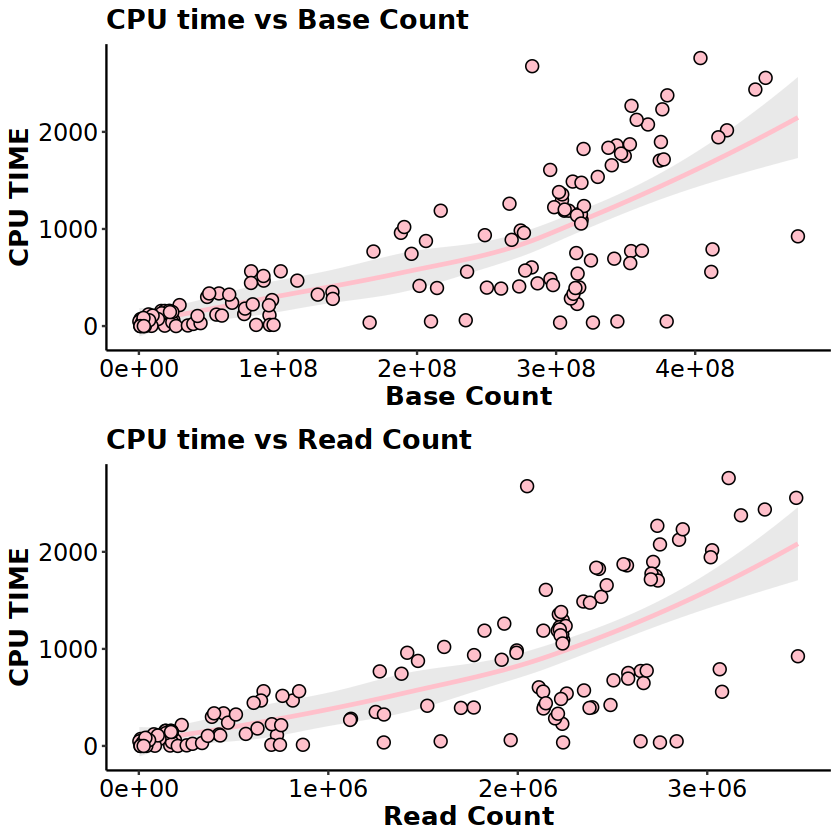

In [103]:
ggarrange(first, second, ncol = 1, legend = 'bottom')